<a href="https://colab.research.google.com/github/dashblack576/Quick_NN/blob/main/Test_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/dashblack576/Quick_NN.git

Cloning into 'Quick_NN'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import tensorflow_datasets as tfds

In [ ]:
raw_data = pd.read_csv("Quick_NN/Literacy rates (no pw2).csv")

year_and_LR = pd.DataFrame(dict(
     year = raw_data['Year'], 
    Literacy_Rate = raw_data['Literacy rate']
))

data_tensor = tf.convert_to_tensor(year_and_LR)


input_vector = data_tensor[0]

output_vector = data_tensor[1]

input_vector

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.011000e+03, 1.761206e-01])>

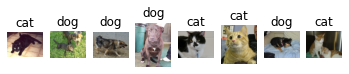

In [ ]:
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [ ]:
def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label


HEIGHT = 200
WIDTH = 200

split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (HEIGHT, WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (HEIGHT, WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (HEIGHT, WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CNN_model.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
509/509 [==============================] - 718s 1s/step - loss: 0.6367 - accuracy: 0.6594 - val_loss: 0.5808 - val_accuracy: 0.6911
Epoch 2/10
509/509 [==============================] - 727s 1s/step - loss: 0.4952 - accuracy: 0.7613 - val_loss: 0.5009 - val_accuracy: 0.7560
Epoch 3/10
509/509 [==============================] - 728s 1s/step - loss: 0.3990 - accuracy: 0.8199 - val_loss: 0.4891 - val_accuracy: 0.7723
Epoch 4/10
509/509 [==============================] - 734s 1s/step - loss: 0.2888 - accuracy: 0.8788 - val_loss: 0.5767 - val_accuracy: 0.7629
Epoch 5/10
496/509 [============================>.] - ETA: 16s - loss: 0.1993 - accuracy: 0.9185